In [1]:
import pylab as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline 

(-4.206753454933646, 4.407645208063279, -4.992964081889243, 3.633179329243363)

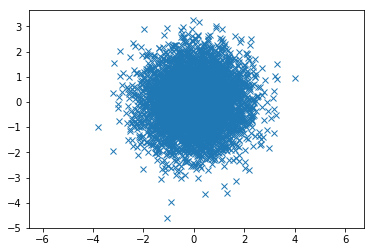

In [2]:
mean = [0, 0]
cov = [[1,0],[0,1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')

(-3.800970100111599, 3.428016093012634, -4.0313126685263025, 3.809493723398939)

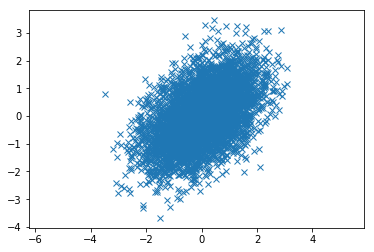

In [3]:
mean = [0, 0]
cov = [[1,0.5],[0.5,1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')

# Analizemos resultados de las elecciones


In [4]:
primary_results = pd.read_csv( 'data/primary_results.csv' )
county_facts = pd.read_csv( 'data/county_facts.csv' )
county_facts_dict = pd.read_csv( 'data/county_facts_dictionary.csv' )
dict_county_facts = {k: v for k, v in zip(county_facts_dict['column_name'].values, county_facts_dict['description'].values)}

In [7]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [8]:
trump_results = primary_results[ primary_results[ 'candidate' ] == 'Donald Trump' ]

In [9]:
trump_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
140,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469
145,Alabama,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501
150,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494
155,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487


In [10]:
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [11]:
df_all =trump_results.merge(county_facts, on=['fips'])

In [12]:
df_all.head()

,state,state_abbreviation_x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation_y,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,Alabama,AL,Baldwin,1003,Republican,Donald Trump,23618,0.469,Baldwin County,AL,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
2,Alabama,AL,Barbour,1005,Republican,Donald Trump,1710,0.501,Barbour County,AL,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
3,Alabama,AL,Bibb,1007,Republican,Donald Trump,1959,0.494,Bibb County,AL,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
4,Alabama,AL,Blount,1009,Republican,Donald Trump,7390,0.487,Blount County,AL,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


In [13]:
df_work = df_all[['EDU635213', 'EDU685213','MAN450207', 'RHI125214']]
#high_school, bachelor, manufacturing shippments, percentage of whites

In [14]:
data = df_work.values

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten = True)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [16]:
pca_data = pca.transform(data)

In [17]:
pca_data.shape

(2711, 2)

In [18]:
pca.components_

array([[ 8.58341876e-08,  3.68264066e-07,  1.00000000e+00,
        -3.02407728e-07],
       [-1.42723450e-01, -2.39662266e-02, -2.78147650e-07,
        -9.89472403e-01]])

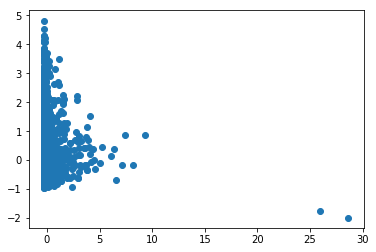

In [19]:
plt.scatter(pca_data[:,0],pca_data[:,1])

In [20]:
pca.explained_variance_ratio_

array([1.00000000e+00, 7.81870621e-12])